# Homework #6

**See Canvas for HW #6 assignment due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems. Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel is preferred). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 



## A. Theoretical Problems

### Problem A.1

Describe why, in a randomized complete block design (RCBD), it is not possible to test whether interactions exist between the treatment and blocks.

In order to test for the interaction between treatments and blocks we would need replication which in it's simpliest form RCBD does not use. In particular without replication there all of the degrees of freedom are used for the model fit, which means that, regardless of whether there is an interaction term or not it will appear to be 0. Instead RCBD lets us test for interaction beforehand by using an interaction plot and seeing if the slopes are the same or nearly the same. If this is the case then the model assumptions are met and RCBD may be a good fit.

http://pages.cs.wisc.edu/~songwang/RCBD.pdf

### Problem A.2

This problem contains several True/False questions. **Please answer each using R code. Store your answer as a logical (either TRUE or FALSE, case sensitive) in a variable named for each part. So, for example, if part (a) were: 2+3 = 5. Your answer would be:**


In [ ]:
a = FALSE

#### (a) Blocking is a technique that can be used to control the variability transmitted by uncontrolled nuisance factors in an experiment.

In [7]:
a = FALSE #need to be controllable so we can ensure blocks are populated in a random manner

#### (b) The number of blocks in a randomized complete block design cannot be equal to the number of treatment levels.

In [8]:
b = FALSE #ex. 4 different social media platforms with 4 different ad campagins would be a valid model

#### (c) Consider the plot on the left in this [link](https://statmodeling.stat.columbia.edu/wp-content/uploads/2020/03/Screen-Shot-2020-03-15-at-5.45.37-PM.png). There is not a substantial interaction between age group and political party. (This [video](https://www.youtube.com/watch?v=JTm739f5hQs) might be a helpful resource.)

In [9]:
c = FALSE #slopes are unequal

#### (d) If an interaction term in a two-way ANOVA model is significant, then one should not trust the estimates or interpretations of main effects alone.

In [10]:
d = TRUE #RCBD makes the assumption that this is the case if the model assumptions are violated we cannot use it

### Problem A.3 <span style="color: #CFB87C;">(STAT 5010 Only)</span>

Show that, for the randomized complete block design, $$SS_{total} = SS_{treat} + SS_{block} + SS_{R},$$

where each of these terms is defined in the Unit #5(b) notes. 

YOUR ANSWER HERE

## B. Computational Problems

### Problem B.1

#### For the teengamb data, fit a model with gamble as the response and ${\tt sex}$ and ${\tt income}$ as predictors. Call the model lmod_teengamb. Investigate the possibility of statistically significant interactions between these predictors. Store your final model--the one with or without interaction terms, depending on the outcome of your investigations--as lmod_final. Interpret the final model.

([Here's](https://rdrr.io/cran/faraway/man/teengamb.html) a description of the data.)

In [11]:
teengamb = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/teengamb.txt", 
          sep = "\t", header = TRUE)

summary(teengamb)

      sex             status          income           verbal     
 Min.   :0.0000   Min.   :18.00   Min.   : 0.600   Min.   : 1.00  
 1st Qu.:0.0000   1st Qu.:28.00   1st Qu.: 2.000   1st Qu.: 6.00  
 Median :0.0000   Median :43.00   Median : 3.250   Median : 7.00  
 Mean   :0.4043   Mean   :45.23   Mean   : 4.642   Mean   : 6.66  
 3rd Qu.:1.0000   3rd Qu.:61.50   3rd Qu.: 6.210   3rd Qu.: 8.00  
 Max.   :1.0000   Max.   :75.00   Max.   :15.000   Max.   :10.00  
     gamble     
 Min.   :  0.0  
 1st Qu.:  1.1  
 Median :  6.0  
 Mean   : 19.3  
 3rd Qu.: 19.4  
 Max.   :156.0  

The following `from` values were not present in `x`: 0, 1


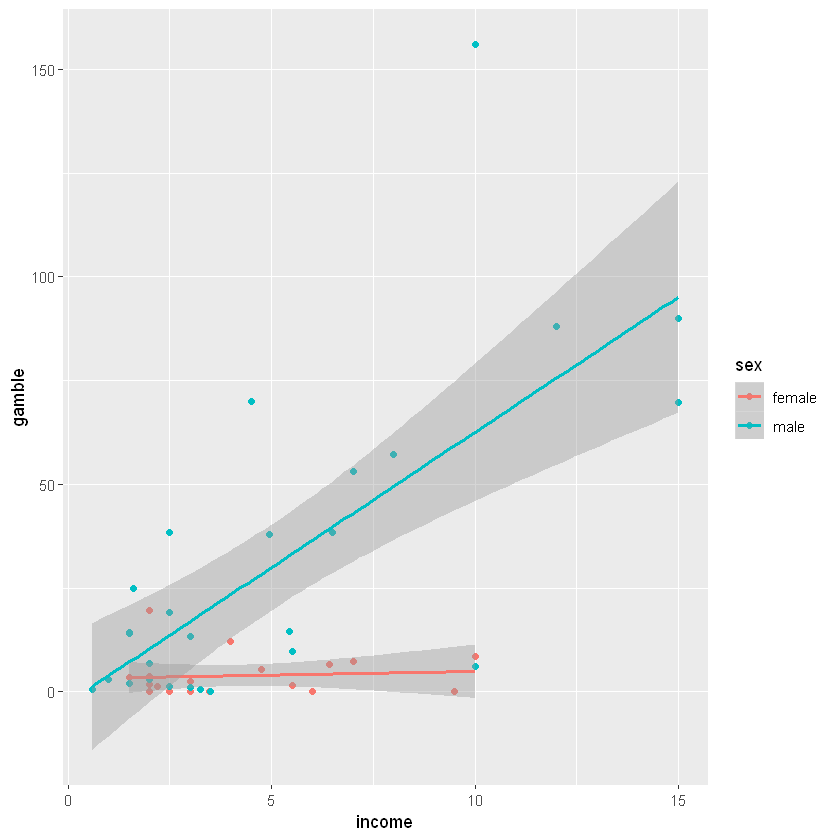

In [17]:
library(tidyverse)
library(plyr)
teengamb$sex = mapvalues(teengamb$sex, c(0,1), c('male', 'female'))
qplot(data = teengamb, x = income, y=gamble, color = sex) + geom_smooth(method = 'lm')

In [18]:
lmod_teengamb = lm(data = teengamb, gamble ~ income + sex)
summary(lmod_teengamb)


Call:
lm(formula = gamble ~ income + sex, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.757 -11.649   0.844   8.659 100.243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.594      6.544  -2.688  0.01010 *  
income         5.172      0.951   5.438 2.24e-06 ***
sexmale       21.634      6.809   3.177  0.00272 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.75 on 44 degrees of freedom
Multiple R-squared:  0.5014,	Adjusted R-squared:  0.4787 
F-statistic: 22.12 on 2 and 44 DF,  p-value: 2.243e-07


In [21]:
lmod_final = lm(data = teengamb, gamble ~ income + sex + income:sex)
summary(lmod_final)
anova(lmod_teengamb, lmod_final)


Call:
lm(formula = gamble ~ income + sex + income:sex, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.522  -4.860  -1.790   6.273  93.478 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)      3.1400     9.2492   0.339  0.73590   
income           0.1749     1.9034   0.092  0.92721   
sexmale         -5.7996    11.2003  -0.518  0.60724   
income:sexmale   6.3432     2.1446   2.958  0.00502 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20.98 on 43 degrees of freedom
Multiple R-squared:  0.5857,	Adjusted R-squared:  0.5568 
F-statistic: 20.26 on 3 and 43 DF,  p-value: 2.451e-08


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
44,22781.32,NA,NA,NA,NA
43,18929.91,1,3851.411,8.748624,0.005018177


We can see a clear dependency between income and sex as shown by the different slopes for men and women in our q-plot. We then included the interaction term in our final model and run an ANOVA to compare the model with the interaction term against the one without one. We find that the p-value for the F-test is below 0.05 so we can say at the 95% confidence level that there the interaction term should be included in the final model. When we look at the final model we see that the interaction term is actually the only one that we can say at the 95% confidence level that we should include. 

### Problem B.2

The experiment used in this problem is a modified version of the one conducted in the 2013 paper ["Acute Effects of Warm-Up Stretch
Protocols on Balance, Vertical Jump Height and Range of Motion in Dancers"](https://www.ncbi.nlm.nih.gov/pubmed/23498355)

(Citation: N. Morrin and E. Redding (2013). "Acute Effects of Warm-Up Stretch
Protocols on Balnce, Vertical Jump Height and Range of Motion in Dancers,"
Journal of Dance Medicine & Science, Vol. 17, #1, pp. 34-40)

The research question being asked in this experiment is: Does stretching protocol impact vertical jump height? The variables measured include:

1. dancer = dancer (1-10)

2. stretch = stretch protocol (1=Static Stretching, 2=Dynamic Stretching, 3=Combination Stretching, 4=No Stretch)

3. condition = the physical condition of the dancer (1 = less conditioned, 2 = more conditioned)

4. height = vertical jump height (cm) 

Dancers were first sorted into a condition group, based on how much dance training that they had recently done. Then, stretching routines were randomly assigned to dancers within each condition group. In this case, condition served as the blocking variable, and stretch as the treatment variable. Vertical jump height is the response. 

Here's the data...

In [22]:
library(tidyverse)
library(dplyr)

dance = read.table("http://users.stat.ufl.edu/~winner/data/dancer_warmup.dat", sep = "")
names(dance) = c("stretch", "dancer", "height")
dance = dance %>%
    mutate(condition = ifelse(dancer == 1 | dancer == 2 | dancer == 3 | dancer == 4 |
                              dancer == 5, 1,2))%>%
    select(dancer, stretch, condition, height) %>%
    mutate(stretch = as.factor(stretch), dancer = as.factor(dancer), condition = as.factor(condition))

head(dance)


dancer,stretch,condition,height
1,1,1,32.76
2,1,1,32.67
3,1,1,23.04
4,1,1,45.63
5,1,1,29.29
6,1,2,28.90


#### (a) Produce interaction plots to detect whether there are interactions between ${\tt stretch}$ and ${\tt condition}$.

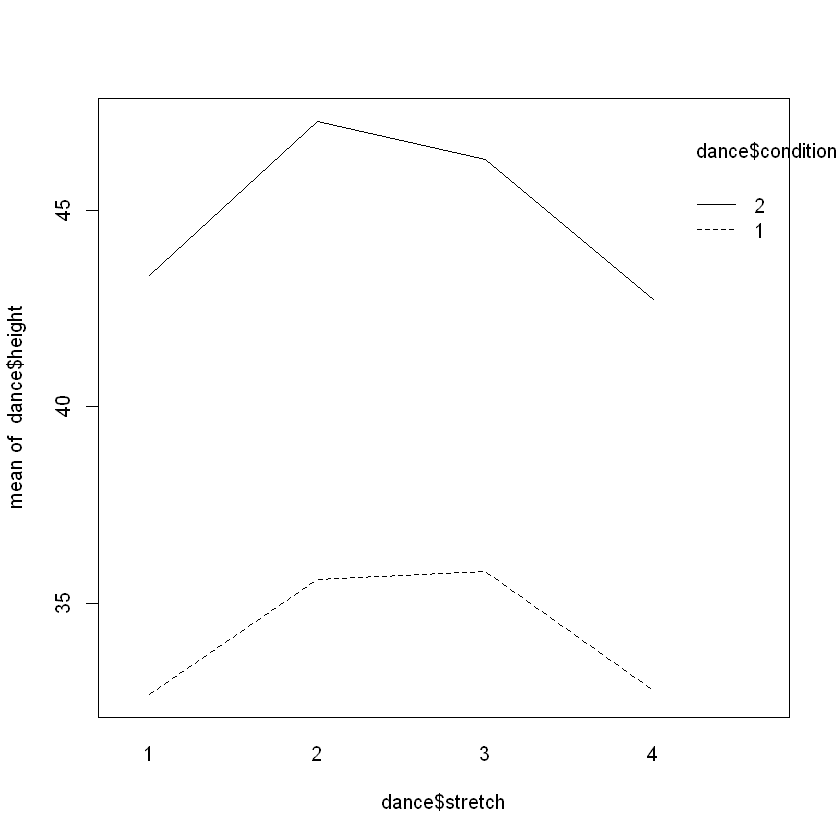

In [23]:
interaction.plot(dance$stretch, dance$condition, dance$height)

The slopes of interaction plot lines are close to parallel so the interaction term is likely insignificant

#### (b) Conduct a formal analysis to decide whether:

1. there is a statistically significant interaction between ${\tt stretch}$ and ${\tt condition}$. **(Store the model *with interaction* term as rcbd_int, and *without an interaction* as rcbd.)**

2. stretching protocol impacts vertical jump height. **(Store the model that you use for this analyis as rcbd_final.)**

Be sure to clearly interpret the code output.

In [25]:
rcbd = lm(data = dance, height ~ stretch + condition)
summary(rcbd)
rcbd_int = lm(data = dance, height ~ stretch + condition + stretch:condition)
summary(rcbd_int)
anova(rcbd_int, rcbd)


Call:
lm(formula = height ~ stretch + condition, data = dance)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2235  -3.4005  -0.1455   6.4913  12.9655 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   32.666      2.867  11.392 2.52e-13 ***
stretch2       3.420      3.627   0.943 0.352178    
stretch3       3.039      3.627   0.838 0.407779    
stretch4      -0.251      3.627  -0.069 0.945221    
condition2    10.689      2.565   4.168 0.000192 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.11 on 35 degrees of freedom
Multiple R-squared:  0.353,	Adjusted R-squared:  0.2791 
F-statistic: 4.774 on 4 and 35 DF,  p-value: 0.00352



Call:
lm(formula = height ~ stretch + condition + stretch:condition, 
    data = dance)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.124  -3.092   0.037   6.742  12.952 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           32.678      3.790   8.622 7.48e-10 ***
stretch2               2.926      5.360   0.546   0.5889    
stretch3               3.126      5.360   0.583   0.5638    
stretch4               0.106      5.360   0.020   0.9843    
condition2            10.664      5.360   1.990   0.0552 .  
stretch2:condition2    0.988      7.580   0.130   0.8971    
stretch3:condition2   -0.174      7.580  -0.023   0.9818    
stretch4:condition2   -0.714      7.580  -0.094   0.9255    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.475 on 32 degrees of freedom
Multiple R-squared:  0.3541,	Adjusted R-squared:  0.2128 
F-statistic: 2.506 on 7 and 32 DF,  p-value: 0.03579


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
32,2298.329,NA,NA,NA,NA
35,2302.113,-3,-3.78429,0.01756309,0.9967649


In [26]:
rcbd_final = rcbd

The intial diagonstic plot correctly showed us that the interaction term is not significant. Both linear models are shown above and the blocking variable, condition is the only indivual t-test that is significant at the 95% confidence level. This is unsuprising because the blocking variable is usually chosen for theoretical concerns, and we are unsuprised that more conditioned dancers have a greater ability dance well. The ANOVA test shows us that the F-stat is above 0.05 so we should fail to reject the NULL: The reduced model is sufficent

The p-value in the last table is large ($p \approx 0.99$). This p-value comes from an F-test that compared the regression/ANOVA models with and without an interaction term. Thus the interaction term is not statistically significant. 

In [27]:
anova(rcbd)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
stretch,3,113.6011,37.86702,0.5757083,0.6348088114
condition,1,1142.5472,1142.54721,17.3706269,0.0001916087
Residuals,35,2302.1134,65.77467,NA,NA


In [29]:
rcbd_red = lm(data = dance, height ~ condition)
anova(rcbd, rcbd_red)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
35,2302.113,NA,NA,NA,NA
38,2415.714,-3,-113.6011,0.5757083,0.6348088


based on the ANOVA for the reduced model we can see that our blocking variable has a p-value below 0.05 so it should be kept in the model. The p-value for stretching is greater than 0.05 and so we ran an ANOVA with a reduced model where only the blocking variable was included and the reduced model appears to sufficent.

#### (c) What can be said about the causal relationship between stretching routines and vertical jump height?

Based on our ANOVA tests we will fail to reject the NULL: stretching and vertical jump are uncorrelated. With correlation causation cannot be established

### Problem B.3

#### (a) The morley data can be viewed as a randomized block experiment with Run as the treatment factor and Expt as the blocking factor. Is there a difference between runs? Store your model as lmod. 

(Information about this dataset can be found [here](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/morley).)

In [40]:
data(morley)
head(morley)
morley$Expt = as.factor(morley$Expt)
morley$Run = as.factor(morley$Run)


,Expt,Run,Speed
001,1,1,850
002,1,2,740
003,1,3,900
004,1,4,1070
005,1,5,930
006,1,6,850


In [41]:
lmod = lm(data = morley, Speed ~ Expt + Run)
anova(lmod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Expt,4,94514,23628.500,4.378144,0.003070589
Run,19,113344,5965.474,1.105348,0.363209341
Residuals,76,410166,5396.921,NA,NA


Our blocking variable, Expt, has a p-value below 0.05 so we need to keep it in our model. The Run variable does not so we cannot conclude that Run and Speed are corellated

#### (b) What is the relative efficiency? Store your answer in a variable called e.

Relative efficiency is defined as 

$$e = \widehat\sigma^2_{CRD}\bigg/\widehat\sigma^2_{RCBD}, $$

and it tells us how many more observations would be needed in a CRD to obtain the same level of precision as a RCBD. For example, if $e = 1.66$, then a CRD would require 66% more observations to obtain the same level of precision as an RCBD.

In [45]:
lmod2 = lm(data = morley, Speed ~ Run)
aov(lmod2)
aov(lmod)

Call:
   aov(formula = lmod2)

Terms:
                   Run Residuals
Sum of Squares  113344    504680
Deg. of Freedom     19        80

Residual standard error: 79.42607
Estimated effects may be unbalanced

Call:
   aov(formula = lmod)

Terms:
                  Expt    Run Residuals
Sum of Squares   94514 113344    410166
Deg. of Freedom      4     19        76

Residual standard error: 73.46374
Estimated effects may be unbalanced

In [47]:
(79.42607/73.46374)^2

[1] 1.168907

We can conclude that the RCBD is 16.9% more efficient